In [219]:
import pandas as pd
import numpy as np
import sklearn

In [220]:
df = pd.read_csv('CLAIM.csv')

In [221]:
df.head(10)

,ID,CHILD_DRIV,AGE,CHILDREN,YOJ,INCOME,HOUSE_VAL,STATUS,GENDER,EDU_LEVEL,JOB,DISTANCE,CAR_USE,VEHICLE_VAL,VEHICLE_TYPE,CLM_FREQ,REVOKED,MVR_PTS,CLAIM_AMOUNT,VEHICLE_AGE,CLAIM_IND,AREA,STATE_CODE
0,6.921625e+09,0,67.0,0,14.0,"$53,841","$359,229",z_No,Mal,Bachelors,None,71,Private,"$21,970",Family,0,No,2,$294,12.0,0,Highly Urban/ Urban,Berlin
1,1.227899e+09,0,26.0,1,13.0,"$16,999","$265,527",NaN,Fem,z_High School,Clerical,50,Private,"$4,010",unknown,4,No,7,$292,12.0,0,Highly Urban/ Urban,Thueringen
2,1.950524e+09,0,71.0,0,17.0,NaN,"$323,918",Yes,Mal,<High School,Teacher,77,Private,"$15,440",Minivan,0,No,0,$387,8.0,0,Highly Urban/ Urban,Bayern
3,1.743448e+09,0,68.0,0,NaN,"$115,546","$361,705",Yes,Fem,PhD,Doctor,81,Private,"$18,000",unknown,4,Yes,3,$308,19.0,0,Highly Urban/ Urban,Bayern
4,7.371333e+09,0,32.0,1,15.0,"$125,861","$70,668",z_No,Fem,Bachelors,Teacher,91,Commercial,"$17,430",Sports Car,0,No,0,"$3,221",9.0,1,Highly Urban/ Urban,Bayern
5,4.792606e+09,0,60.0,0,NaN,"$19,715",NaN,Yes,Fem,<High School,Teacher,78,Private,"$8,780",unknown,0,No,0,$308,3.0,0,Highly Urban/ Urban,Bayern
6,7.008255e+09,1,49.0,1,14.0,"$51,375","$530,010",NaN,Mal,z_High School,None,66,Private,"$18,930",Minivan,3,No,2,"$6,658",3.0,1,Highly Urban/ Urban,Bayern
7,6.003886e+09,0,68.0,2,15.0,"$44,446","$111,891",z_No,Fem,<High School,Teacher,75,Commercial,"$5,900",unknown,0,No,2,$203,12.0,0,z_Highly Rural/ Rural,Bayern
8,4.892513e+09,1,58.0,2,NaN,"$108,921","$480,905",Yes,Mal,Bachelors,Teacher,89,Commercial,"$16,970",Van,1,Yes,10,"$4,312",9.0,1,Highly Urban/ Urban,Bayern
9,3.577688e+09,0,23.0,0,13.0,"$64,338","$300,339",z_No,Fem,Bachelors,Clerical,79,Private,"$11,200",unknown,0,No,4,"$2,734",3.0,1,Highly Urban/ Urban,Berlin


In [222]:
df = df.replace('\$','',regex=True)
df = df.replace('\,','.',regex=True)


In [223]:
df['HOUSE_VAL'] = df['HOUSE_VAL'].str.replace('.','')

In [224]:
df.head()


,ID,CHILD_DRIV,AGE,CHILDREN,YOJ,INCOME,HOUSE_VAL,STATUS,GENDER,EDU_LEVEL,JOB,DISTANCE,CAR_USE,VEHICLE_VAL,VEHICLE_TYPE,CLM_FREQ,REVOKED,MVR_PTS,CLAIM_AMOUNT,VEHICLE_AGE,CLAIM_IND,AREA,STATE_CODE
0,6.921625e+09,0,67.0,0,14.0,53.841,359229,z_No,Mal,Bachelors,None,71,Private,21.970,Family,0,No,2,294,12.0,0,Highly Urban/ Urban,Berlin
1,1.227899e+09,0,26.0,1,13.0,16.999,265527,NaN,Fem,z_High School,Clerical,50,Private,4.010,unknown,4,No,7,292,12.0,0,Highly Urban/ Urban,Thueringen
2,1.950524e+09,0,71.0,0,17.0,NaN,323918,Yes,Mal,<High School,Teacher,77,Private,15.440,Minivan,0,No,0,387,8.0,0,Highly Urban/ Urban,Bayern
3,1.743448e+09,0,68.0,0,NaN,115.546,361705,Yes,Fem,PhD,Doctor,81,Private,18.000,unknown,4,Yes,3,308,19.0,0,Highly Urban/ Urban,Bayern
4,7.371333e+09,0,32.0,1,15.0,125.861,70668,z_No,Fem,Bachelors,Teacher,91,Commercial,17.430,Sports Car,0,No,0,3.221,9.0,1,Highly Urban/ Urban,Bayern


In [225]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,10300.0,4.536920e+09,3.054715e+09,11300316.0,2.135318e+09,3.964367e+09,6.280446e+09,2.017790e+10
CHILD_DRIV,10300.0,1.700000e-01,5.073812e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
AGE,10293.0,5.379792e+01,1.317220e+01,5.0,4.500000e+01,5.400000e+01,6.300000e+01,1.030000e+02
CHILDREN,10300.0,7.209709e-01,1.116310e+00,0.0,0.000000e+00,0.000000e+00,1.000000e+00,5.000000e+00
YOJ,9752.0,1.347395e+01,4.109358e+00,3.0,1.200000e+01,1.400000e+01,1.600000e+01,2.600000e+01
DISTANCE,10300.0,7.841942e+01,1.586968e+01,50.0,6.700000e+01,7.800000e+01,8.900000e+01,1.870000e+02
CLM_FREQ,10300.0,1.808641e+00,1.528187e+00,0.0,0.000000e+00,2.000000e+00,3.000000e+00,7.000000e+00
MVR_PTS,10300.0,3.202621e+00,2.585899e+00,0.0,2.000000e+00,3.000000e+00,5.000000e+00,1.700000e+01
VEHICLE_AGE,9661.0,1.029790e+01,5.713707e+00,-1.0,3.000000e+00,1.000000e+01,1.400000e+01,3.000000e+01
CLAIM_IND,10300.0,2.666019e-01,4.422039e-01,0.0,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00


In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10300 entries, 0 to 10299
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            10300 non-null  float64
 1   CHILD_DRIV    10300 non-null  int64  
 2   AGE           10293 non-null  float64
 3   CHILDREN      10300 non-null  int64  
 4   YOJ           9752 non-null   float64
 5   INCOME        9730 non-null   object 
 6   HOUSE_VAL     9725 non-null   object 
 7   STATUS        10298 non-null  object 
 8   GENDER        10300 non-null  object 
 9   EDU_LEVEL     10300 non-null  object 
 10  JOB           9635 non-null   object 
 11  DISTANCE      10300 non-null  int64  
 12  CAR_USE       10300 non-null  object 
 13  VEHICLE_VAL   10300 non-null  object 
 14  VEHICLE_TYPE  10300 non-null  object 
 15  CLM_FREQ      10300 non-null  int64  
 16  REVOKED       10300 non-null  object 
 17  MVR_PTS       10300 non-null  int64  
 18  CLAIM_AMOUNT  10300 non-nu

In [227]:
df[['CLAIM_AMOUNT','INCOME','VEHICLE_VAL','HOUSE_VAL']] = df[['CLAIM_AMOUNT','INCOME','VEHICLE_VAL','HOUSE_VAL']].astype('float')

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10300 entries, 0 to 10299
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            10300 non-null  float64
 1   CHILD_DRIV    10300 non-null  int64  
 2   AGE           10293 non-null  float64
 3   CHILDREN      10300 non-null  int64  
 4   YOJ           9752 non-null   float64
 5   INCOME        9730 non-null   float64
 6   HOUSE_VAL     9725 non-null   float64
 7   STATUS        10298 non-null  object 
 8   GENDER        10300 non-null  object 
 9   EDU_LEVEL     10300 non-null  object 
 10  JOB           9635 non-null   object 
 11  DISTANCE      10300 non-null  int64  
 12  CAR_USE       10300 non-null  object 
 13  VEHICLE_VAL   10300 non-null  float64
 14  VEHICLE_TYPE  10300 non-null  object 
 15  CLM_FREQ      10300 non-null  int64  
 16  REVOKED       10300 non-null  object 
 17  MVR_PTS       10300 non-null  int64  
 18  CLAIM_AMOUNT  10300 non-nu

In [229]:
df.columns

Index(['ID', 'CHILD_DRIV', 'AGE', 'CHILDREN', 'YOJ', 'INCOME', 'HOUSE_VAL',
       'STATUS', 'GENDER', 'EDU_LEVEL', 'JOB', 'DISTANCE', 'CAR_USE',
       'VEHICLE_VAL', 'VEHICLE_TYPE', 'CLM_FREQ', 'REVOKED', 'MVR_PTS',
       'CLAIM_AMOUNT', 'VEHICLE_AGE', 'CLAIM_IND', 'AREA', 'STATE_CODE'],
      dtype='object')

In [230]:
X = df[['CHILD_DRIV', 'AGE', 'CHILDREN', 'YOJ', 'INCOME', 'HOUSE_VAL',
       'STATUS', 'GENDER', 'EDU_LEVEL', 'JOB', 'DISTANCE', 'CAR_USE',
       'VEHICLE_VAL', 'VEHICLE_TYPE', 'CLM_FREQ', 'REVOKED', 'MVR_PTS', 'VEHICLE_AGE', 'CLAIM_AMOUNT', 'AREA', 'STATE_CODE']]
Y = df['CLAIM_IND']

In [231]:
X.isnull().sum()

CHILD_DRIV        0
AGE               7
CHILDREN          0
YOJ             548
INCOME          570
HOUSE_VAL       575
STATUS            2
GENDER            0
EDU_LEVEL         0
JOB             665
DISTANCE          0
CAR_USE           0
VEHICLE_VAL       0
VEHICLE_TYPE      0
CLM_FREQ          0
REVOKED           0
MVR_PTS           0
VEHICLE_AGE     639
CLAIM_AMOUNT      0
AREA              0
STATE_CODE        0
dtype: int64

#Заменяем пропущенные значения



In [232]:
X_mean = X.mean()
X_mean

CHILD_DRIV           0.170000
AGE                 53.797921
CHILDREN             0.720971
YOJ                 13.473954
INCOME             118.930173
HOUSE_VAL       416898.584679
DISTANCE            78.419417
VEHICLE_VAL         15.660132
CLM_FREQ             1.808641
MVR_PTS              3.202621
VEHICLE_AGE         10.297899
CLAIM_AMOUNT       225.372876
dtype: float64

In [233]:
X.fillna(X_mean, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [234]:
X.isnull().sum()

CHILD_DRIV        0
AGE               0
CHILDREN          0
YOJ               0
INCOME            0
HOUSE_VAL         0
STATUS            2
GENDER            0
EDU_LEVEL         0
JOB             665
DISTANCE          0
CAR_USE           0
VEHICLE_VAL       0
VEHICLE_TYPE      0
CLM_FREQ          0
REVOKED           0
MVR_PTS           0
VEHICLE_AGE       0
CLAIM_AMOUNT      0
AREA              0
STATE_CODE        0
dtype: int64

In [235]:
X_mode = X.mode()
X_mode

,CHILD_DRIV,AGE,CHILDREN,YOJ,INCOME,HOUSE_VAL,STATUS,GENDER,EDU_LEVEL,JOB,DISTANCE,CAR_USE,VEHICLE_VAL,VEHICLE_TYPE,CLM_FREQ,REVOKED,MVR_PTS,VEHICLE_AGE,CLAIM_AMOUNT,AREA,STATE_CODE
0,0,54.0,0,15.0,118.930173,416898.584679,Yes,Fem,z_High School,Teacher,50,Private,1.5,unknown,2,No,2,3.0,285.0,Highly Urban/ Urban,Bayern


In [236]:
X = X.fillna({'JOB': 'Teacher', 'STATUS': 'Yes'})

In [237]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10300 entries, 0 to 10299
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CHILD_DRIV    10300 non-null  int64  
 1   AGE           10300 non-null  float64
 2   CHILDREN      10300 non-null  int64  
 3   YOJ           10300 non-null  float64
 4   INCOME        10300 non-null  float64
 5   HOUSE_VAL     10300 non-null  float64
 6   STATUS        10300 non-null  object 
 7   GENDER        10300 non-null  object 
 8   EDU_LEVEL     10300 non-null  object 
 9   JOB           10300 non-null  object 
 10  DISTANCE      10300 non-null  int64  
 11  CAR_USE       10300 non-null  object 
 12  VEHICLE_VAL   10300 non-null  float64
 13  VEHICLE_TYPE  10300 non-null  object 
 14  CLM_FREQ      10300 non-null  int64  
 15  REVOKED       10300 non-null  object 
 16  MVR_PTS       10300 non-null  int64  
 17  VEHICLE_AGE   10300 non-null  float64
 18  CLAIM_AMOUNT  10300 non-nu

##Достаем уникальные значения

In [238]:
X.JOB.unique()

array(['None', 'Clerical', 'Teacher', 'Doctor', 'Banking', 'Nurse',
       'Manager', 'Home Maker', 'Professional', 'Student', 'Police'],
      dtype=object)

In [239]:
X.STATUS.unique()

array(['z_No', 'Yes'], dtype=object)

#Преобразуем категориальные переменные


In [240]:
categor = ['JOB', 'STATUS', 'AREA', 'GENDER', 'STATE_CODE', 'REVOKED','VEHICLE_TYPE','CAR_USE', 'EDU_LEVEL']

In [241]:
X = pd.get_dummies(data = X, columns= categor)


In [242]:
X.shape

(10300, 56)

In [243]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10300 entries, 0 to 10299
Data columns (total 56 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   CHILD_DRIV                       10300 non-null  int64  
 1   AGE                              10300 non-null  float64
 2   CHILDREN                         10300 non-null  int64  
 3   YOJ                              10300 non-null  float64
 4   INCOME                           10300 non-null  float64
 5   HOUSE_VAL                        10300 non-null  float64
 6   DISTANCE                         10300 non-null  int64  
 7   VEHICLE_VAL                      10300 non-null  float64
 8   CLM_FREQ                         10300 non-null  int64  
 9   MVR_PTS                          10300 non-null  int64  
 10  VEHICLE_AGE                      10300 non-null  float64
 11  CLAIM_AMOUNT                     10300 non-null  float64
 12  JOB_Banking       

##Разделение выборки

In [244]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=13)
X_train.shape, X_test.shape


((6180, 56), (4120, 56))

In [245]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoLarsIC
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score

In [246]:
df.CLAIM_AMOUNT.min

<bound method Series.min of 0        294.000
1        292.000
2        387.000
3        308.000
4          3.221
          ...   
10295    294.000
10296    261.000
10297    411.000
10298    272.000
10299    251.000
Name: CLAIM_AMOUNT, Length: 10300, dtype: float64>

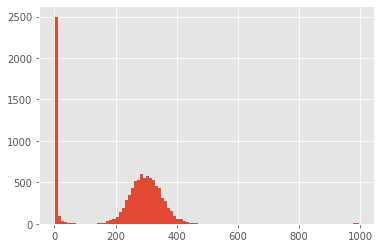

In [247]:
import seaborn as sns
from matplotlib import pyplot as plt
df.CLAIM_AMOUNT.hist(bins=100, grid=True, )

In [248]:
import numpy as np

def mean_absolute_percentage_error(y_pred, y_test): 
    y_pred, y_test = np.array(y_pred), np.array(y_test)
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

In [249]:
ridge = Ridge(alpha=100).fit(X_train, y_train)

In [250]:
mean_absolute_error(y_test, ridge.predict(X_test))

0.1389149722472286

In [251]:
r2_score(y_test, ridge.predict(X_test))

0.7519128320915676

In [252]:
ridge.predict(X_test)

array([0.74843695, 0.12240421, 0.09783035, ..., 0.07889344, 0.145061  ,
       0.87427618])

In [253]:
mean_squared_error(ridge.predict(X_test), y_test)

0.049135111695307813

In [254]:
from sklearn.model_selection import GridSearchCV

grid_searcher = GridSearchCV(Ridge(),
                             param_grid={'alpha': np.linspace(100, 750, 10)},
                             cv=5).fit(X_train, y_train)

In [255]:
mean_squared_error(grid_searcher.predict(X_test), y_test)

0.049135111695307813

In [256]:
grid_searcher.best_params_

{'alpha': 100.0}

##Классификация


In [257]:
df.head()

,ID,CHILD_DRIV,AGE,CHILDREN,YOJ,INCOME,HOUSE_VAL,STATUS,GENDER,EDU_LEVEL,JOB,DISTANCE,CAR_USE,VEHICLE_VAL,VEHICLE_TYPE,CLM_FREQ,REVOKED,MVR_PTS,CLAIM_AMOUNT,VEHICLE_AGE,CLAIM_IND,AREA,STATE_CODE
0,6.921625e+09,0,67.0,0,14.0,53.841,359229.0,z_No,Mal,Bachelors,None,71,Private,21.97,Family,0,No,2,294.000,12.0,0,Highly Urban/ Urban,Berlin
1,1.227899e+09,0,26.0,1,13.0,16.999,265527.0,NaN,Fem,z_High School,Clerical,50,Private,4.01,unknown,4,No,7,292.000,12.0,0,Highly Urban/ Urban,Thueringen
2,1.950524e+09,0,71.0,0,17.0,NaN,323918.0,Yes,Mal,<High School,Teacher,77,Private,15.44,Minivan,0,No,0,387.000,8.0,0,Highly Urban/ Urban,Bayern
3,1.743448e+09,0,68.0,0,NaN,115.546,361705.0,Yes,Fem,PhD,Doctor,81,Private,18.00,unknown,4,Yes,3,308.000,19.0,0,Highly Urban/ Urban,Bayern
4,7.371333e+09,0,32.0,1,15.0,125.861,70668.0,z_No,Fem,Bachelors,Teacher,91,Commercial,17.43,Sports Car,0,No,0,3.221,9.0,1,Highly Urban/ Urban,Bayern


In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10300 entries, 0 to 10299
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            10300 non-null  float64
 1   CHILD_DRIV    10300 non-null  int64  
 2   AGE           10293 non-null  float64
 3   CHILDREN      10300 non-null  int64  
 4   YOJ           9752 non-null   float64
 5   INCOME        9730 non-null   float64
 6   HOUSE_VAL     9725 non-null   float64
 7   STATUS        10298 non-null  object 
 8   GENDER        10300 non-null  object 
 9   EDU_LEVEL     10300 non-null  object 
 10  JOB           9635 non-null   object 
 11  DISTANCE      10300 non-null  int64  
 12  CAR_USE       10300 non-null  object 
 13  VEHICLE_VAL   10300 non-null  float64
 14  VEHICLE_TYPE  10300 non-null  object 
 15  CLM_FREQ      10300 non-null  int64  
 16  REVOKED       10300 non-null  object 
 17  MVR_PTS       10300 non-null  int64  
 18  CLAIM_AMOUNT  10300 non-nu

In [259]:
df['EDU_LEVEL'] = [x.replace('z_','') for x in df['EDU_LEVEL'].values]
df['EDU_LEVEL'] = [x.replace('<','') for x in df['EDU_LEVEL'].values]
df['AREA'] = [x.replace('z_','') for x in df['AREA'].values]

df = df.drop(columns=['ID'])
df = df.drop(columns=['JOB'])

df['STATUS'] = df['STATUS'].map({'No': 0, 'Yes': 1})
df['GENDER'] = df['GENDER'].map({'Mal': 0, 'Fem': 1})
df['EDU_LEVEL'] = df['EDU_LEVEL'].map({'Bachelors': 0, 'High School': 1, 'PhD': 2, 'Masters': 3})
df['REVOKED'] = df['REVOKED'].map({'No': 0, 'Yes': 1})
df['CAR_USE'] = df['CAR_USE'].map({'Private': 0, 'Commercial': 1})
df['AREA'] = df['AREA'].map({'Highly Urban/ Urban': 0, 'Highly Rural/ Rural': 1})
df['VEHICLE_TYPE'] = df['VEHICLE_TYPE'].map({'Family': 0, 'Minivan': 1, 'Sports Car': 2, 'Van': 3,
                                          'Panel Truck': 4, 'Pickup': 5, 'Racing': 6, 'unknown': 9})
df['STATE_CODE'] = df['STATE_CODE'].map({'Berlin': 0, 'Thueringen': 1, 'Bayern': 2, 'Nordrhein-Westfalen': 3,
                                          'Sachsen-Anhalt': 4, 'Mecklenburg-Vorpomme': 5, 'Hessen': 6, 'Sachsen': 7, 'Brandenburg': 8})

# Удаляем пустые значения
df = df.fillna(-1)

# Меняем тип переменных
df['STATE_CODE'] = df['STATE_CODE'].astype(int)
df['INCOME'] = df['INCOME'].astype(float)
df['HOUSE_VAL'] = df['HOUSE_VAL'].astype(float)
df['CLAIM_AMOUNT'] = df['CLAIM_AMOUNT'].astype(float)

In [260]:
data = df[['CHILD_DRIV', 'AGE', 'CHILDREN', 'YOJ', 'INCOME', 'HOUSE_VAL',
       'STATUS', 'GENDER', 'EDU_LEVEL', 'DISTANCE', 'CAR_USE',
       'VEHICLE_VAL', 'VEHICLE_TYPE', 'CLM_FREQ', 'REVOKED', 'MVR_PTS', 
       'VEHICLE_AGE', 'AREA', 'STATE_CODE']]
target = df['CLAIM_IND']

In [261]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=30)

In [262]:
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve, mean_squared_error, r2_score, confusion_matrix, classification_report
from sklearn import metrics

In [263]:
models = []
models.append(DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=5, class_weight='balanced'))
models.append(LogisticRegression(solver='newton-cg', class_weight="balanced"))
models.append(RandomForestClassifier(n_estimators = 51, max_depth=11, class_weight= 'balanced'))
models.append(GradientBoostingClassifier())

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

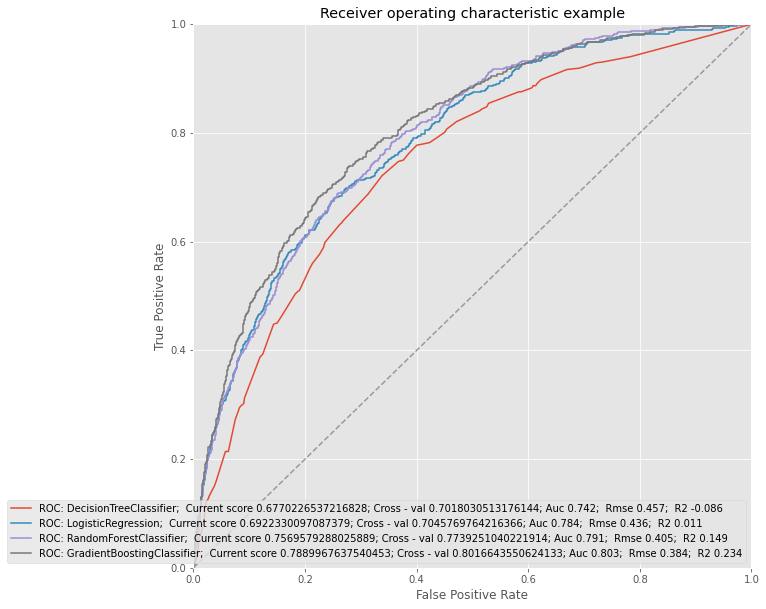

In [264]:
plt.figure(figsize=(10, 10))
for model in models:
    model.fit(X_train, y_train)
    
 # оцениваем точность модели
    current_score = model.score(X_test, y_test)

#оцениваем кросс валидацию
    kfold = KFold(n_splits=10, shuffle=True, random_state=7)
    cv_result = max(cross_val_score(model, X_train, y_train, cv=kfold))
 
 #генерируем предсказания
    pred_scr = model.predict_proba(X_test)[:, 1]
    
# вычисление среднеквадратичной ошибки
    rmse = np.sqrt(mean_squared_error(y_test, pred_scr))

# вычисление коэффициента детерминизации
    r2 = r2_score(y_test, pred_scr)
    
# вычисляем площадь под ROC-кривой   
    roc_auc = roc_auc_score(y_test, pred_scr)
    
    md = str(model)
    md = md[:md.find('(')]
    
    roc_auc_print = round(roc_auc, 3)
    rmse_print = round(rmse, 3)
    r2_print = round(r2, 3)
    
    fpr, tpr, thresholds = roc_curve(y_test, pred_scr)
    plt.plot(fpr, tpr, label='ROC: {};  {} {}; {} {}; {} {};  {} {};  {} {}'.format(md, 'Current score', current_score, 'Cross - val', cv_result, 'Auc', roc_auc_print, 'Rmse', rmse_print, 'R2',
                                                                     r2_print))
    
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Keras

In [280]:
from keras import layers as L
from keras.models import Sequential
from keras.models import Model
import keras.optimizers as opt
from sklearn.metrics import log_loss

### Построение модели
Мы использовали

In [266]:
def getModel( ):
    model = Sequential(name = 'Claim')
    
    model.add(L.Dense(16, input_dim = X_train.shape[1], kernel_initializer='random_normal'))
    model.add(L.Activation('sigmoid'))
    model.add(L.Dense(8, kernel_initializer='random_normal'))
    model.add(L.Activation('sigmoid'))
    model.add(L.Dense(2, activation='softmax', kernel_initializer = 'random_normal'))
    
    optimizer = opt.Adam(learning_rate=0.001)

    model.compile(loss = 'categorical_crossentropy', 
                  metrics=["accuracy"], 
                  optimizer=optimizer)
    
    return model

In [267]:
model = getModel( )

In [268]:
model.summary()

Model: "Claim"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 16)                320       
_________________________________________________________________
activation_8 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 8)                 136       
_________________________________________________________________
activation_9 (Activation)    (None, 8)                 0         
_________________________________________________________________
dense_14 (Dense)             (None, 2)                 18        
Total params: 474
Trainable params: 474
Non-trainable params: 0
_________________________________________________________________


Выведем количество наблюдений для оценки каждого параметра

In [269]:
X_train.shape[0]/320

22.53125

Переводим переменную  y в матрицу из дамми-переменных

In [270]:
from tensorflow.keras.utils import to_categorical
to_categorical(Y)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

Нормализуем выборку для лучшей сходимости переменных

In [271]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Обучаем модель

In [272]:
hist = model.fit(X_train, to_categorical(y_train), validation_split=0.3, epochs=200, verbose=1)

Epoch 1/200
158/158 [==============================] - 2s 5ms/step - loss: 0.6283 - accuracy: 0.7262 - val_loss: 0.5825 - val_accuracy: 0.7217
Epoch 2/200
158/158 [==============================] - 0s 2ms/step - loss: 0.5745 - accuracy: 0.7273 - val_loss: 0.5712 - val_accuracy: 0.7217
Epoch 3/200
158/158 [==============================] - 0s 2ms/step - loss: 0.5664 - accuracy: 0.7242 - val_loss: 0.5592 - val_accuracy: 0.7217
Epoch 4/200
158/158 [==============================] - 0s 2ms/step - loss: 0.5485 - accuracy: 0.7290 - val_loss: 0.5442 - val_accuracy: 0.7217
Epoch 5/200
158/158 [==============================] - 0s 2ms/step - loss: 0.5242 - accuracy: 0.7382 - val_loss: 0.5293 - val_accuracy: 0.7217
Epoch 6/200
158/158 [==============================] - 0s 2ms/step - loss: 0.5270 - accuracy: 0.7232 - val_loss: 0.5197 - val_accuracy: 0.7217
Epoch 7/200
158/158 [==============================] - 0s 2ms/step - loss: 0.4975 - accuracy: 0.7457 - val_loss: 0.5072 - val_accuracy: 0.7217

Выведем динамику ошибок нашей модели

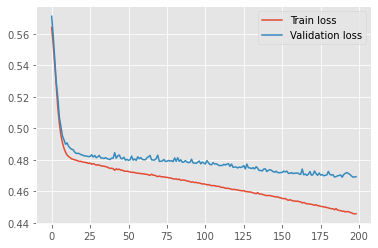

In [273]:
start = 1
plt.plot(hist.history['loss'][start:])
plt.plot(hist.history['val_loss'][start:])
plt.legend(['Train loss', 'Validation loss'])

А также метрики, указанные при инициализации модели

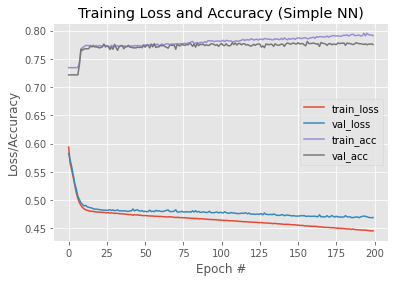

In [274]:
N = np.arange(0, 200)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, hist.history["loss"], label="train_loss")
plt.plot(N, hist.history["val_loss"], label="val_loss")
plt.plot(N, hist.history["accuracy"], label="train_acc")
plt.plot(N, hist.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()


Попробуем предсказать вероятности для тестовой выборки

In [277]:
model.predict_proba(X_test)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


array([[0.6950751 , 0.304925  ],
       [0.40157503, 0.59842503],
       [0.8397737 , 0.16022632],
       ...,
       [0.9577159 , 0.04228412],
       [0.9668332 , 0.03316687],
       [0.9621254 , 0.03787459]], dtype=float32)

Классы

In [278]:
model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([0, 1, 0, ..., 0, 0, 0])

И logloss

In [281]:
log_loss(y_test,model.predict_proba(X_test))

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


0.4659547557053684

Выведем качество модели по указаным выше метрикам (loss, accuracy)

In [276]:
score = model.evaluate(X_test, to_categorical(y_test), verbose=0)
score 

[0.4659547507762909, 0.7786407470703125]